✅ Number of diseases removed: 410


C:\Users\USER\AppData\Local\Temp\ipykernel_8292\23879495.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model saved as xgboost_model.pkl

✅ Classification Report:
                                                 precision    recall  f1-score   support

                               abdominal hernia       0.96      0.89      0.92        53
                                abscess of nose       0.83      0.96      0.89        25
                         abscess of the pharynx       0.81      0.96      0.88        27
                                           acne       0.97      0.88      0.93        43
                              actinic keratosis       0.74      0.76      0.75       160
                            acute bronchiolitis       0.97      0.96      0.96       226
                               acute bronchitis       0.82      0.81      0.81       193
                             acute bronchospasm       0.82      0.77      0.80       142
                            acute kidney injury       0.96      0.97      0.97       159
                             acute otitis media 

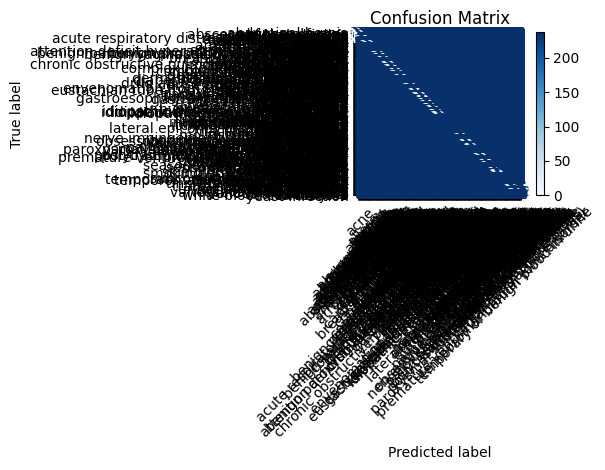

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import torch

# ========= 1. Load and Clean Data =========
df = pd.read_csv(r'C:\Users\USER\Downloads\data\cleaned__file.csv')
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Drop disease classes with fewer than 100 samples
disease_counts = df['diseases'].value_counts()
valid_diseases = disease_counts[disease_counts >= 100].index
removed_diseases = disease_counts[disease_counts < 100].index

# Separate valid and removed diseases
df_valid = df[df['diseases'].isin(valid_diseases)]
df_removed = df[df['diseases'].isin(removed_diseases)]

# Save filtered data
df_valid.to_csv('remaining_diseases.csv', index=False)
df_removed.to_csv('removed_diseases.csv', index=False)

print(f"✅ Number of diseases removed: {len(removed_diseases)}")

# ========= 2. Preprocessing =========
# Encode labels
le = LabelEncoder()
df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])

# Split features and labels
X = df_valid.drop(columns=['diseases', 'disease_encoded'])
y = df_valid['disease_encoded']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Compute class weights
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
sample_weights = np.array([class_weights[label] for label in y_train])

# ========= 3. Train Model =========
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False
)

model.fit(X_train, y_train, sample_weight=sample_weights)

# Save model
joblib.dump(model, 'xgboost_model.pkl')
print("✅ Model saved as xgboost_model.pkl")

# ========= 4. Evaluate =========
y_pred = model.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(
    y_test, y_pred,
    labels=np.unique(y_test),
    target_names=le.inverse_transform(np.unique(y_test))
))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

# ========= 5. Confusion Matrix =========
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


✅ Number of diseases removed: 457


C:\Users\USER\AppData\Local\Temp\ipykernel_8292\3069207214.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model saved as xgboost_model.pkl

✅ Classification Report:
                                                 precision    recall  f1-score   support

                               abdominal hernia       0.93      0.98      0.95        53
                                           acne       0.88      0.86      0.87        43
                              actinic keratosis       0.75      0.77      0.76       160
                            acute bronchiolitis       0.97      0.95      0.96       226
                               acute bronchitis       0.91      0.88      0.89       193
                             acute bronchospasm       0.81      0.76      0.78       143
                            acute kidney injury       0.97      0.97      0.97       159
                             acute otitis media       0.79      0.87      0.83       103
                             acute pancreatitis       0.90      0.91      0.91       240
     acute respiratory distress syndrome (ards) 

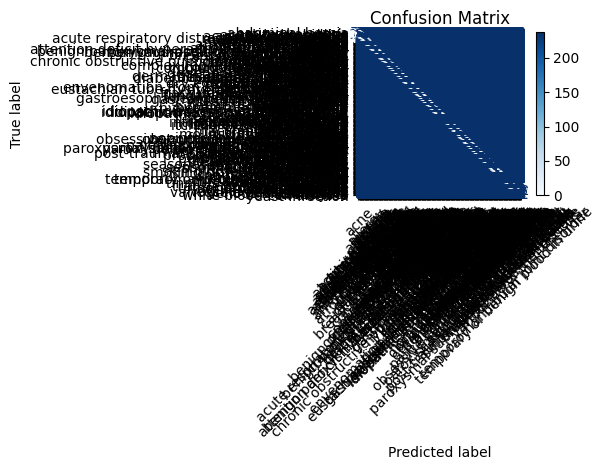

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import torch

# ========= 1. Load and Clean Data =========
df = pd.read_csv(r'C:\Users\USER\Downloads\data\cleaned__file.csv')
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Drop disease classes with fewer than 100 samples
disease_counts = df['diseases'].value_counts()
valid_diseases = disease_counts[disease_counts >= 150].index
removed_diseases = disease_counts[disease_counts < 150].index

# Separate valid and removed diseases
df_valid = df[df['diseases'].isin(valid_diseases)]
df_removed = df[df['diseases'].isin(removed_diseases)]

# Save filtered data
df_valid.to_csv('remaining_diseases.csv', index=False)
df_removed.to_csv('removed_diseases.csv', index=False)

print(f"✅ Number of diseases removed: {len(removed_diseases)}")

# ========= 2. Preprocessing =========
# Encode labels
le = LabelEncoder()
df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])

# Split features and labels
X = df_valid.drop(columns=['diseases', 'disease_encoded'])
y = df_valid['disease_encoded']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Compute class weights
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
sample_weights = np.array([class_weights[label] for label in y_train])

# ========= 3. Train Model =========
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False
)

model.fit(X_train, y_train, sample_weight=sample_weights)

# Save model
joblib.dump(model, 'xgboost_model.pkl')
print("✅ Model saved as xgboost_model.pkl")

# ========= 4. Evaluate =========
y_pred = model.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(
    y_test, y_pred,
    labels=np.unique(y_test),
    target_names=le.inverse_transform(np.unique(y_test))
))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

# ========= 5. Confusion Matrix =========
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


✅ Diseases with <100 samples removed: 410


C:\Users\USER\AppData\Local\Temp\ipykernel_8292\3547261240.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model saved as xgb_model_100plus.pkl

✅ Classification Report:
                                                 precision    recall  f1-score   support

                               abdominal hernia       0.96      0.89      0.92        53
                                abscess of nose       0.83      0.96      0.89        25
                         abscess of the pharynx       0.81      0.96      0.88        27
                                           acne       0.97      0.88      0.93        43
                              actinic keratosis       0.74      0.76      0.75       160
                            acute bronchiolitis       0.97      0.96      0.96       226
                               acute bronchitis       0.82      0.81      0.81       193
                             acute bronchospasm       0.82      0.77      0.80       142
                            acute kidney injury       0.96      0.97      0.97       159
                             acute otitis me

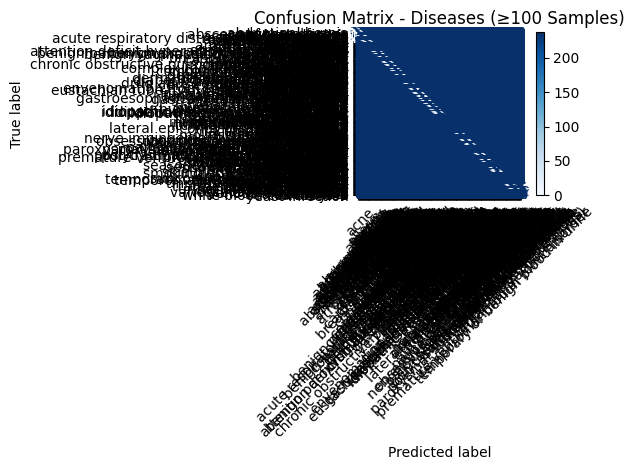

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import torch

# ========= 1. Load and Filter Data =========
df = pd.read_csv(r'C:\Users\USER\Downloads\data\cleaned__file.csv')
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Keep only diseases with at least 100 samples
disease_counts = df['diseases'].value_counts()
valid_diseases = disease_counts[disease_counts >= 100].index
removed_diseases = disease_counts[disease_counts < 100].index

df_valid = df[df['diseases'].isin(valid_diseases)]
df_removed = df[df['diseases'].isin(removed_diseases)]

# Save filtered datasets
df_valid.to_csv('diseases_100plus.csv', index=False)
df_removed.to_csv('diseases_under_100.csv', index=False)

print(f"✅ Diseases with <100 samples removed: {len(removed_diseases)}")

# ========= 2. Preprocessing =========
le = LabelEncoder()
df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])

X = df_valid.drop(columns=['diseases', 'disease_encoded'])
y = df_valid['disease_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([dict(enumerate(weights))[label] for label in y_train])

# ========= 3. Train Model =========
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False
)

model.fit(X_train, y_train, sample_weight=sample_weights)

joblib.dump(model, 'xgb_model_100plus.pkl')
print("✅ Model saved as xgb_model_100plus.pkl")

# ========= 4. Evaluate =========
y_pred = model.predict(X_test)
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.inverse_transform(np.unique(y_test))))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

# ========= 5. Confusion Matrix =========
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix - Diseases (≥100 Samples)")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import joblib

# ========= 1. Load and Filter Data =========
df = pd.read_csv(r'C:\Users\USER\Downloads\data\cleaned__file.csv')

disease_counts = df['diseases'].value_counts()
low_sample_diseases = disease_counts[(disease_counts < 100) & (disease_counts >= 10)].index
removed_diseases = disease_counts[disease_counts >= 100].index

df_valid = df[df['diseases'].isin(low_sample_diseases)]
df_removed = df[df['diseases'].isin(removed_diseases)]

df_valid.to_csv('diseases_10to99.csv', index=False)
df_removed.to_csv('excluded_from_low_data.csv', index=False)

print(f"✅ Diseases with 10–99 samples retained: {len(low_sample_diseases)}")

# ========= 2. Preprocessing =========
le = LabelEncoder()
df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])

X = df_valid.drop(columns=['diseases', 'disease_encoded'])
y = df_valid['disease_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([dict(enumerate(weights))[label] for label in y_train])

# ========= 3. Train Model =========
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False
)

model.fit(X_train, y_train, sample_weight=sample_weights)

joblib.dump(model, 'xgb_model_10to99.pkl')
print("✅ Model saved as xgb_model_10to99.pkl")

# ========= 4. Evaluate =========
y_pred = model.predict(X_test)
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.inverse_transform(np.unique(y_test))))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))


✅ Diseases with 10–99 samples retained: 227


C:\Users\USER\AppData\Local\Temp\ipykernel_8292\694000958.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['disease_encoded'] = le.fit_transform(df_valid['diseases'])
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:47:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model saved as xgb_model_10to99.pkl

✅ Classification Report:
                                            precision    recall  f1-score   support

                 abdominal aortic aneurysm       0.78      1.00      0.88         7
                                 achalasia       0.67      1.00      0.80         4
                            acute glaucoma       1.00      0.88      0.94        17
       adhesive capsulitis of the shoulder       1.00      1.00      1.00         6
                   alcoholic liver disease       1.00      0.94      0.97        18
                        allergy to animals       1.00      1.00      1.00         2
                                 amblyopia       1.00      0.67      0.80         3
       amyotrophic lateral sclerosis (als)       1.00      1.00      1.00         3
      anemia due to chronic kidney disease       1.00      1.00      1.00         7
                           aplastic anemia       0.86      1.00      0.92         6
           

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


✅ Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1737
           1       0.99      1.00      0.99     32102

    accuracy                           0.99     33839
   macro avg       0.98      0.92      0.95     33839
weighted avg       0.99      0.99      0.99     33839

Confusion Matrix:
 [[ 1467   270]
 [   59 32043]]

✅ Model saved as models/symptom_group_classifier.pkl


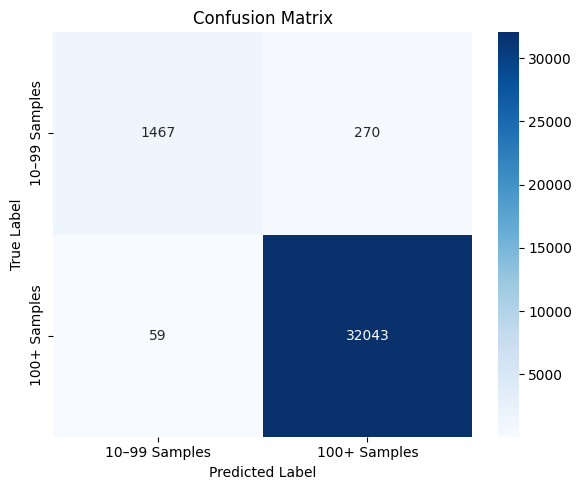

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load the datasets ===
df_100plus = pd.read_csv("diseases_100plus.csv")
df_10to99 = pd.read_csv("diseases_10to99.csv")

# === 2. Add the target column ===
df_100plus["target"] = 1
df_10to99["target"] = 0

# === 3. Combine datasets
df_all = pd.concat([df_100plus, df_10to99], ignore_index=True)

# === 4. Separate features and labels
X = df_all.drop(columns=["diseases", "target"])
y = df_all["target"]

# === 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === 6. Compute class weights for imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))

# === 7. Train the classifier
clf = RandomForestClassifier(
    n_estimators=200,
    class_weight=weights_dict,
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# === 8. Evaluate
y_pred = clf.predict(X_test)
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# === 9. Save the model
os.makedirs("models", exist_ok=True)
joblib.dump(clf, "models/symptom_group_classifier.pkl")
print("\n✅ Model saved as models/symptom_group_classifier.pkl")
# === Plot the confusion matrix as a heatmap ===
cm = confusion_matrix(y_test, y_pred)
labels = ['10–99 Samples', '100+ Samples']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1737
           1       0.85      1.00      0.92      1737

    accuracy                           0.91      3474
   macro avg       0.93      0.91      0.91      3474
weighted avg       0.93      0.91      0.91      3474

Confusion Matrix:
 [[1441  296]
 [   2 1735]]


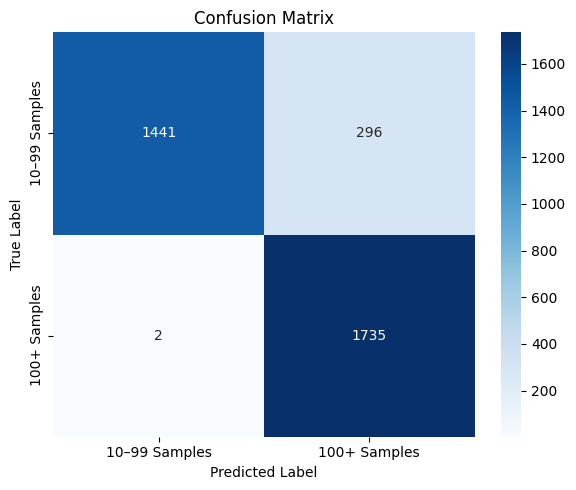


✅ Model saved as models/symptom_group_classifier.pkl


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# === 1. Load the datasets ===
df_100plus = pd.read_csv("diseases_100plus.csv")
df_10to99 = pd.read_csv("diseases_10to99.csv")

# === 2. Add the target column ===
df_100plus["target"] = 1
df_10to99["target"] = 0

# === 3. Combine datasets
df_all = pd.concat([df_100plus, df_10to99], ignore_index=True)

# === 4. Separate features and labels
X = df_all.drop(columns=["diseases", "target"])
y = df_all["target"]

# === 5. Train/test split with stratification
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# === 6. Balance test set manually (equal number of each class)
test_df = X_test_full.copy()
test_df["target"] = y_test_full

# Separate each class
test_class0 = test_df[test_df["target"] == 0]
test_class1 = test_df[test_df["target"] == 1]

# Find minimum class count
min_test_samples = min(len(test_class0), len(test_class1))

# Downsample both to same size
test_class0_balanced = test_class0.sample(n=min_test_samples, random_state=42)
test_class1_balanced = test_class1.sample(n=min_test_samples, random_state=42)

# Combine and shuffle
test_balanced = pd.concat([test_class0_balanced, test_class1_balanced]).sample(frac=1, random_state=42)

# Final test sets
X_test = test_balanced.drop(columns=["target"])
y_test = test_balanced["target"]

# Final train set (everything not in test set)
X_train = X.drop(index=test_balanced.index)
y_train = y.drop(index=test_balanced.index)

# === 7. Compute class weights for imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))

# === 8. Train the classifier
clf = RandomForestClassifier(
    n_estimators=200,
    class_weight=weights_dict,
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# === 9. Evaluate
y_pred = clf.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# === 10. Plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
labels = ['10–99 Samples', '100+ Samples']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === 11. Save the model
os.makedirs("models", exist_ok=True)
joblib.dump(clf, "models/symptom_group_classifier.pkl")
print("\n✅ Model saved as models/symptom_group_classifier.pkl")
